# frame house

# Window frame house

**Objectives:**
- Analyse a cubic building with 4 identical walls with insulation & a transparent wall (glass window) & a birck wall with no insulation, air infiltration, and HVAC system controlling the indoor air temperature.
- Model the heat transfer in the building by a thermal circuit.
- Obtain the mathematical model as a system of Differential Algebraic Equations (DAE) from the thermal circuit.
- Transfrom the system of DAE into state-space representation.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


The house is a cube whose one face is glass, one is brick whith no insulation and one is concrete with insulation. The cube is 3 meters long.

<div>
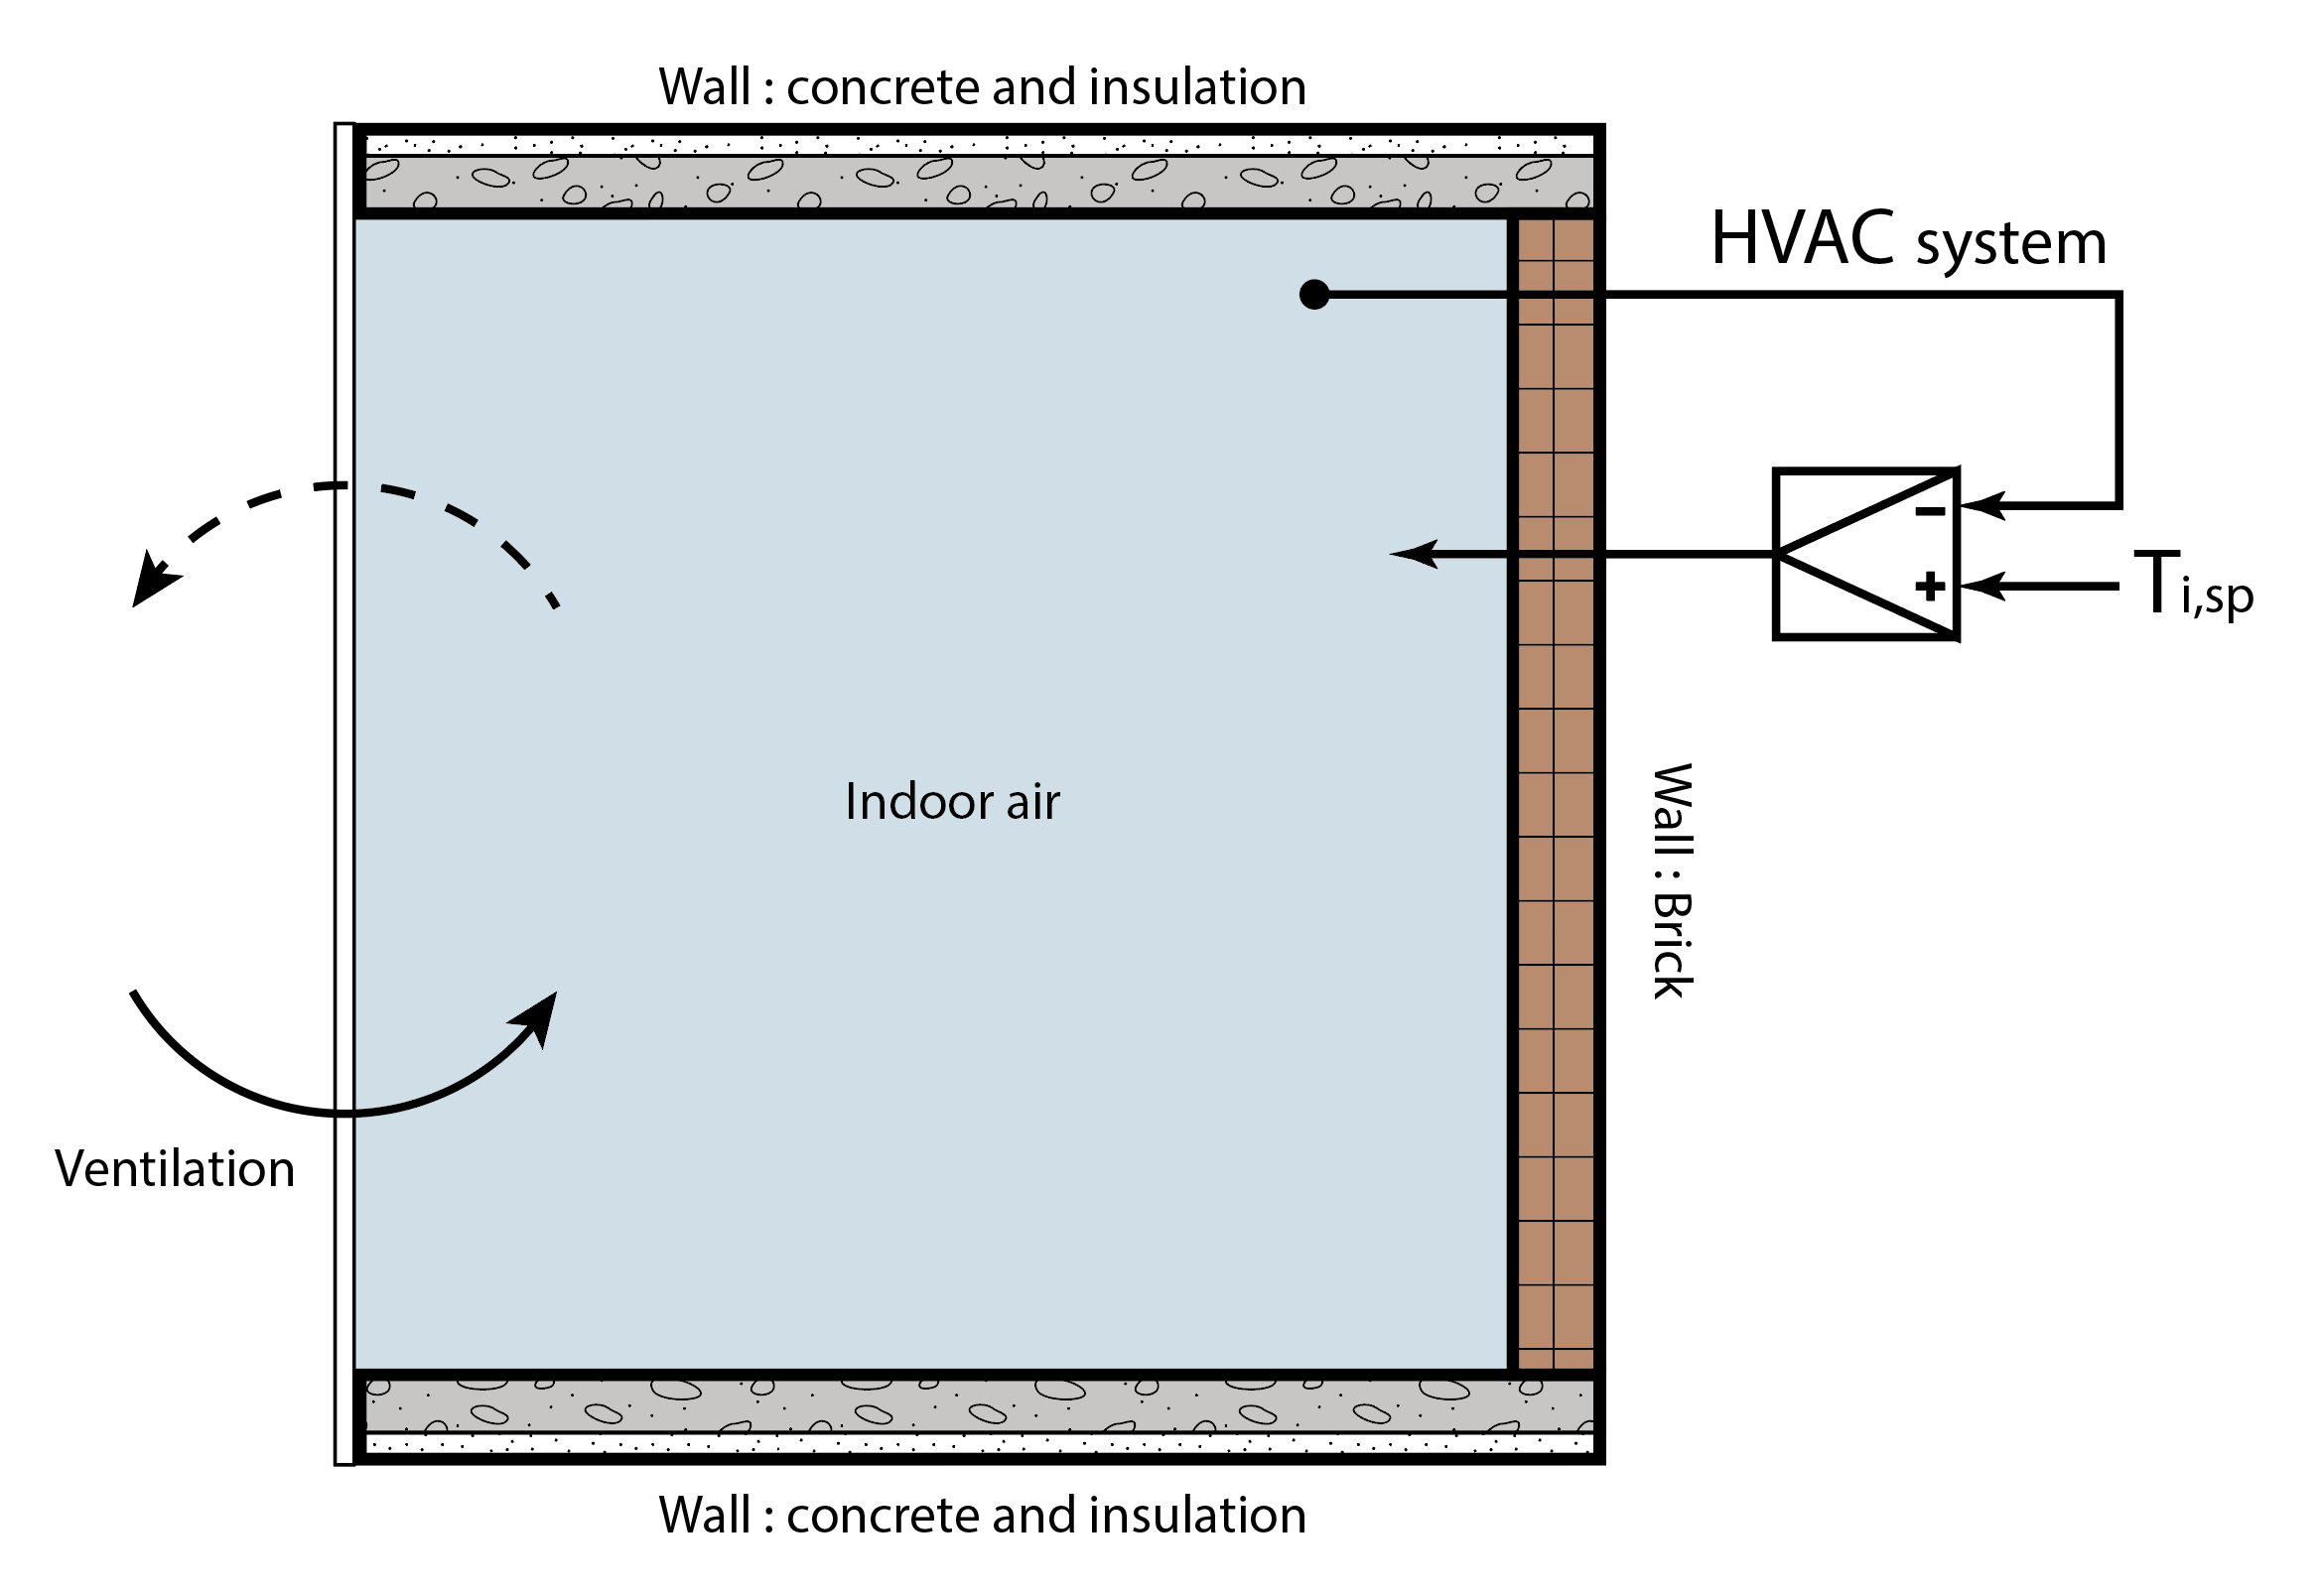
</div>

In [2]:
l = 3               # m length of the cubic room
Sg = l**2           # m² surface area of the glass wall
Sc = Si = 4 * Sg    # m² surface area of concrete & insulation of the __4__ walls

Sb = l**2           #m² surface of the simple brick wall

### Thermal network

The thermal network shows the. The node 6 represents the temperature inside the room. The branch on the right is the new wall that we integrated. It is a brick wall without insulation.

In this model we will not take in consideration the heat exchange by radiation between the brick wall and the glass and concrete walls. The influence of these heat exchanges is very low in comparison whith the other.

<div>
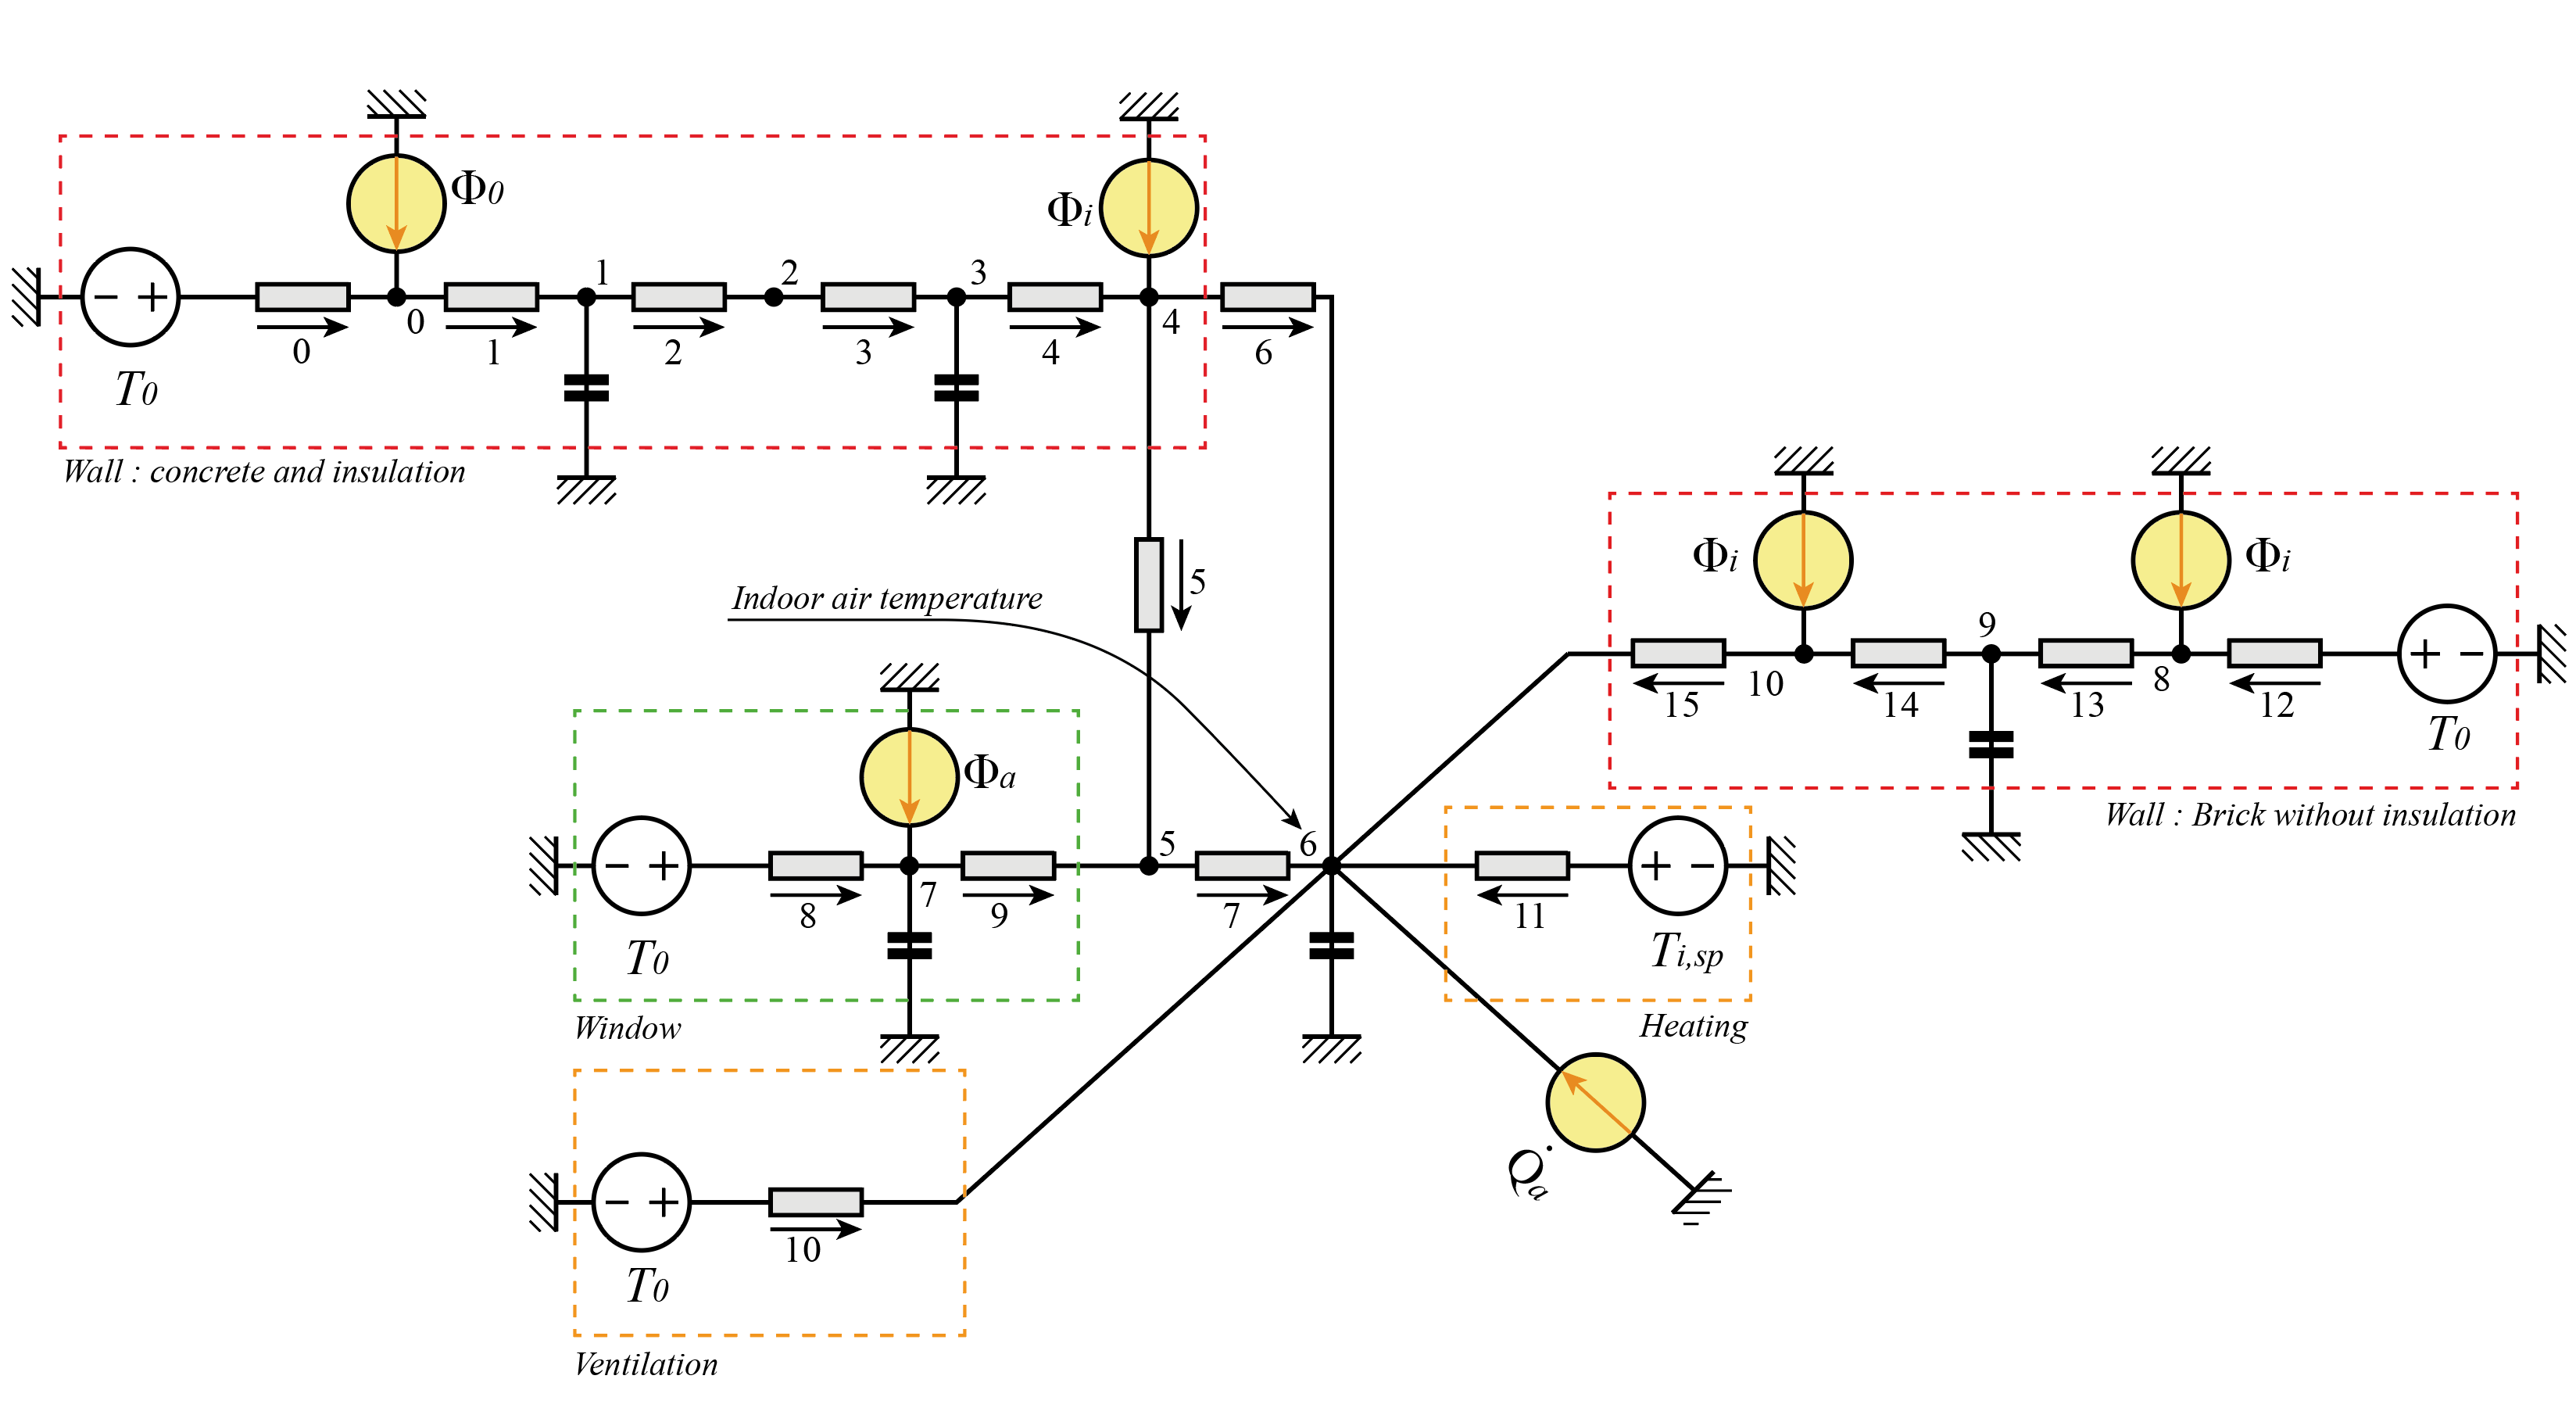
</div>

### Thermo-physical properties
The thermophysical properties of the air (in SI units) are:

In [3]:
#thermophysical properties of the air
air = {'Density': 1.2,                      # kg/m³
       'Specific heat': 1000}               # J/(kg·K)
pd.DataFrame(air, index=['Air'])

,Density,Specific heat
Air,1.2,1000


### Material properties
The material's properties of the different walls (in SI units) are:

In [4]:
#thermical proprerties of the different materials
concrete = {'Conductivity': 1.400,          # W/(m·K)
            'Density': 2300.0,              # kg/m³
            'Specific heat': 880,           # J/(kg⋅K)
            'Width': 0.2,                   # m
            'Surface': 4 * l**2}            # m²

insulation = {'Conductivity': 0.027,        # W/(m·K)
              'Density': 55.0,              # kg/m³
              'Specific heat': 1210,        # J/(kg⋅K)
              'Width': 0.08,                # m
              'Surface': 4 * l**2}          # m²

glass = {'Conductivity': 1.4,               # W/(m·K)
         'Density': 2500,                   # kg/m³
         'Specific heat': 1210,             # J/(kg⋅K)
         'Width': 0.04,                     # m
         'Surface': l**2}                   # m²

brick = {'Conductivity': 1.5,               # W/(m·K)
         'Density': 1650,                   # kg/m³
         'Specific heat': 840,             # J/(kg⋅K)
         'Width': 0.2,                     # m
         'Surface': l**2}                   # m²


wall = pd.DataFrame.from_dict({'Layer_out': concrete,
                               'Layer_in': insulation,
                               'Glass': glass,
                               'Brick' : brick},
                              orient='index')

### Radiative properties

The [radiative properties](https://en.wikipedia.org/wiki/Emissivity#Absorptivity) of the surfaces are:
- long wave [emmisivity](https://www.engineeringtoolbox.com/emissivity-coefficients-d_447.html) of concrete (between normal and rough) and pyrex glass;
- short wave [absortivity of solar radiation](https://www.engineeringtoolbox.com/solar-radiation-absorbed-materials-d_1568.html) of white smooth surfaces;
- short wave [transmittance](https://www.engineeringtoolbox.com/optical-properties-glazing-materials-d_1355.html) of window glass (thickness of 4 mm);
- short wave [absortivity and transmittance](https://energieplus-lesite.be/techniques/enveloppe7/composants-de-l-enveloppe/vitrages/vitrage-permettant-le-controle-solaire/) of reflective blue window glass.



In [5]:
ε_wLW = 0.85    # long wave emmisivity: wall surface (concrete)
ε_gLW = 0.90    # long wave emmisivity: glass pyrex
ε_bLW = 0.91    # long wave emmisivity: wall surface (brick)
α_wSW = 0.25    # short wave absortivity: white smooth surface
α_gSW = 0.38    # short wave absortivity: reflective blue glass
τ_gSW = 0.30    # short wave transmitance: reflective blue glass

The [Stefan-Boltzmann constant](https://en.m.wikipedia.org/wiki/Stefan–Boltzmann_constant) is:

In [6]:
σ = 5.67e-8     # W/(m²⋅K⁴) Stefan-Bolzmann constant
print(f'σ = {σ} W/(m²⋅K⁴)')

σ = 5.67e-08 W/(m²⋅K⁴)


### Convection coefficients

Conventional values for the [convection coeficients](https://energieplus-lesite.be/theories/enveloppe9/echanges-chaleur-parois/resistance-thermique-d-echange-superficiel/) for indoor and outdoor convection in W/(m²⋅K) are:

In [7]:
h = pd.DataFrame([{'in': 8., 'out': 25}], index=['h'])  # W/(m²⋅K)
h

,in,out
h,8.0,25


### Thermal conductances
We write the conductances of conduction in the wall and the convection as :


In [8]:
#thermical flux in a wall 
G_cd = wall['Conductivity'] / wall['Width'] * wall['Surface']

# convection
Gw = h * wall['Surface'][0]     # wall
Gg = h * wall['Surface'][2]     # glass
Gb = h * wall['Surface'][3]     #brick

### View factor

In order to calculate the energy that is transmitted by the radiation between the glass and the walls, we have to determine a view-factor as below :

In [9]:
# view factor wall-glass
Fwg = glass['Surface'] / concrete['Surface']
# view factor brick wall glass
Fbwg = glass['Surface'] / brick['Surface']

In [10]:
T_int = 273.15 + np.array([0, 40])
coeff = np.round((4 * σ * T_int**3), 1)
print(f'For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ {coeff}')

T_int = 273.15 + np.array([10, 30])
coeff = np.round((4 * σ * T_int**3), 1)
print(f'For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ {coeff}')

T_int = 273.15 + 20
coeff = np.round((4 * σ * T_int**3), 1)
print(f'For (T/K - 273.15)°C = 20°C, 4σT³ = {4 * σ * T_int**3:.1f} W/(m²·K)')

For 0°C < (T/K - 273.15)°C < 40°C, 4σT³/[W/(m²·K)] ∈ [4.6 7. ]
For 10°C < (T/K - 273.15)°C < 30°C, 4σT³/[W/(m²·K)] ∈ [5.1 6.3]
For (T/K - 273.15)°C = 20°C, 4σT³ = 5.7 W/(m²·K)


In [11]:
# long wave radiation
Tm = 20 + 273   # K, mean temp for radiative exchange

GLW1 = 4 * σ * Tm**3 * ε_wLW / (1 - ε_wLW) * wall['Surface']['Layer_in']
GLW12 = 4 * σ * Tm**3 * Fwg * wall['Surface']['Layer_in']
GLW2 = 4 * σ * Tm**3 * ε_gLW / (1 - ε_gLW) * wall['Surface']['Glass']

GLW = 1 / (1 / GLW1 + 1 / GLW12 + 1 / GLW2) #long-wave heat exchange between the wall and the glass window

### Ventilation flow rate

The model allows to generate a ventilation flow rate that is defined here :

In order to see how the model responds, it might be interesting to change the ventilation flow rates to see how the model responds.

In [12]:
# ventilation flow rate
Va = l**3                   # m³, volume of air
ACH = 0                     # 1/h, air changes per hour
Va_dot = ACH / 3600 * Va    # m³/s, air infiltration

In [13]:
# ventilation & advection
Gv = air['Density'] * air['Specific heat'] * Va_dot

### Controller

We can consider a controller with different possible gains. We can try to change the gain of the controller to see how the model responds.

In [14]:
# P-controler gain
# Kp = 1e4            # almost perfect controller Kp -> ∞
# Kp = 1e-3           # no controller Kp -> 0
Kp = 100

In [15]:
# glass: convection outdoor & conduction
Ggs = float(1 / (1 / Gg.loc['h', 'out'] + 1 / (2 * G_cd['Glass'])))



### Heat capacity

The walls and the air have heat capacity. It is the amount of heat to be supplied to an object to produce a unit change of the temperature.

In [16]:
C = wall['Density'] * wall['Specific heat'] * wall['Surface'] * wall['Width']
pd.DataFrame(C, columns=['Capacity'])

C['Air'] = air['Density'] * air['Specific heat'] * Va
pd.DataFrame(C, columns=['Capacity'])

,Capacity
Layer_out,14572800.0
Layer_in,191664.0
Glass,1089000.0
Brick,2494800.0
Air,32400.0


### Temperature nodes and flow rates

The temperature nodes describe for each space the temperature that is associated.

$θ_{0}$ is the temperature of the outside surface of the insulation

$θ_{1}$ is the temperature of the inside of the insulation

$θ_{2}$ is the temperature of the interface between concrete and insulation

$θ_{3}$ is the temperature of the inside of the concrete

$θ_{4}$ is the temperature of the internal surface of the concrete

$θ_{5}$ is the temperature of the indoor surface of the glass

$θ_{6}$ is the temperature of the air in the room

$θ_{7}$ is the temperature of the outdoor surface of the glass

$θ_{8}$ is the temperature of the outdoor surface of the brick wall

$θ_{9}$ is the temperature of the inside of the brick wall

$θ_{10}$ is the temperature of the indoor surface of the brick wall


The flow-rate branches describe the different heat exchanges between the different nodes as described by the thermal network.

In [17]:

# temperature nodes
θ = ['θ0', 'θ1', 'θ2', 'θ3', 'θ4', 'θ5', 'θ6', 'θ7', 'θ8', 'θ9','θ10']

# flow-rate branches
q = ['q0', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']

The incidence matrix explains the relations between the nodes, and wich flow rate goes from one node to another.

$A_{kl} = \begin{cases}\phantom{-}
0 & \text{if branch } q_k \text{ is not connected to node }  \theta_l \\ 
+1 & \text{if branch } q_k \text{ enters into node }  \theta_l\\ 
-1 & \text{if branch } q_k \text{ gets out of node }  \theta_l 
\end{cases}$

For the themal circuit shown in Figure 4,

$ A = \begin{cases}
A_{0,0} = 1\\ 
A_{1,0} = -1, A_{1,1} = 1\\ 
...\\
A_{11,6} = 1\\
\end{cases}$

In [18]:
A = np.zeros([16, 11])       # n° of branches X n° of nodes
A[0, 0] = 1                 # branch 0: -> node 0
A[1, 0], A[1, 1] = -1, 1    # branch 1: node 0 -> node 1
A[2, 1], A[2, 2] = -1, 1    # branch 2: node 1 -> node 2
A[3, 2], A[3, 3] = -1, 1    # branch 3: node 2 -> node 3
A[4, 3], A[4, 4] = -1, 1    # branch 4: node 3 -> node 4
A[5, 4], A[5, 5] = -1, 1    # branch 5: node 4 -> node 5
A[6, 4], A[6, 6] = -1, 1    # branch 6: node 4 -> node 6
A[7, 5], A[7, 6] = -1, 1    # branch 7: node 5 -> node 6
A[8, 7] = 1                 # branch 8: -> node 7
A[9, 5], A[9, 7] = 1, -1    # branch 9: node 5 -> node 7
A[10, 6] = 1                # branch 10: -> node 6
A[11, 6] = 1                # branch 11: -> node 6

A[12,8] = 1                 #branch 12 (sun on brick wall): -> node 8 
A[13,8], A[13,9] = -1, 1    #branch 13 (conduction in brick wall) : node 8 -> node 9
A[14,9], A[14,10] = -1, 1   #branch 13 (conduction in brick wall) : node 8 -> node 9  
A[15,10], A[15,6] = -1, 1   #branch 14 (convection between brick wall and indoor space) : node 9 -> 6

pd.DataFrame(A, index=q, columns=θ)

,θ0,θ1,θ2,θ3,θ4,θ5,θ6,θ7,θ8,θ9,θ10
q0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q1,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q2,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q3,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q4,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
q5,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0
q6,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
q7,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,0.0
q8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
q9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0


### G: conductance matrix

The conductance matrix of the themal circuit shown in Figure 4 is diagonal:

$ G = \begin{cases}
G_{0,0} = G_{w,out} & \text{convection outside surface of the wall}\\ 
G_{1,1} = G_{2,2} = 2G_{cd,Layer\,out} & \text{conduction in half width of the outer layer}\\ 
G_{3,3} = G_{4,4} = 2G_{cd,Layer\,in} & \text{conduction in half width of the inner layer}\\ 
G_{5,5} = G_{LW} & \text{long-wave radiation walls - window}\\
G_{6,6} = G_{w,in} & \text{convection inside surface of the wall}\\
G_{7,7} = G_{g,in} & \text{convection inside surface of the glass}\\
G_{8,8} = G_{gs} & \text{convection outside surface of the glass}\\  & \text{and conduction in half width of the glass}\\
G_{9,9} = 2G_{cd,glass} & \text{conduction in half width of the glass}\\
G_{10,10} = G_v & \text{advection by ventilation}\\
G_{11,11} = K_p & \text{gain of proportional controller}\\
G_{12,12} = Gb{b,out} & \text{convection outside surface of the brick wall}\\
G_{13,13} = G_{14,14} = 2G_{cd,brick wall} & \text{conduction in half width of the brick wall}\\
G_{15,15} = G_{b,in} & \text{convection inside surface of the brick wall}\\
\end{cases}$

In [19]:
G = np.array(np.hstack(
    [Gw['out'],
     2 * G_cd['Layer_out'], 2 * G_cd['Layer_out'],
     2 * G_cd['Layer_in'], 2 * G_cd['Layer_in'],
     GLW,
     Gw['in'],
     Gg['in'],
     Ggs,
     2 * G_cd['Glass'],
     Gv,
     Kp,
     Gb['out'],
     2 * G_cd['Brick'],2 * G_cd['Brick'],
     Gb['in']]))

# np.set_printoptions(precision=3, threshold=16, suppress=True)
# pd.set_option("display.precision", 1)
pd.DataFrame(G, index=q)

,0
q0,900.000000
q1,504.000000
q2,504.000000
q3,24.300000
q4,24.300000
q5,44.444746
q6,288.000000
q7,72.000000
q8,165.789474
q9,630.000000


### C: capacity matrix

The capacity matrix of the themal circuit is diagonal:

$ C = \begin{cases}
C_{1,1} = C_{Layer\,out} & \text{outer layer of the wall}\\ 
C_{3,3} = C_{Layer\,in} & \text{inner layer of the wall}\\ 
C_{6,6} = C_{Air} & \text{air of the room}\\ 
C_{7,7} = C_{Glass} & \text{glass of the windows}\\
C_{9,9} = C_{Brick} & \text{brick wall}\\
\end{cases}$

The thermal capacities of the air and of the glass can be neglected or not.

In [20]:
neglect_air_glass = False

if neglect_air_glass:
    C = np.array([0, C['Layer_out'], 0, C['Layer_in'], 0, 0,
                  0, C['Glass'], 0, C['Brick'], 0])
else:
    C = np.array([0, C['Layer_out'], 0, C['Layer_in'], 0, 0,
                  C['Air'], C['Glass'], 0, C['Brick'], 0])

# pd.set_option("display.precision", 3)
pd.DataFrame(C, index=θ)

,0
θ0,0.0
θ1,14572800.0
θ2,0.0
θ3,191664.0
θ4,0.0
θ5,0.0
θ6,32400.0
θ7,1089000.0
θ8,0.0
θ9,2494800.0


### temperature source vector

In [21]:
b = pd.Series(['To', 0, 0, 0, 0, 0, 0, 0, 'To', 0, 'To', 'Ti_sp', 'To', 0, 0, 0],
              index=q)

### Heat flow source vector

In [22]:
f = pd.Series(['Φo', 0, 0, 0, 'Φi', 0, 'Qa', 'Φa', 'Φo', 0, 0],
              index=θ)


In [23]:
y = np.zeros(11)         # nodes
y[[6]] = 1              # nodes (temperatures) of interest
pd.DataFrame(y, index=θ)

,0
θ0,0.0
θ1,0.0
θ2,0.0
θ3,0.0
θ4,0.0
θ5,0.0
θ6,1.0
θ7,0.0
θ8,0.0
θ9,0.0


In [24]:
# thermal circuit
A = pd.DataFrame(A, index=q, columns=θ)
G = pd.Series(G, index=q)
C = pd.Series(C, index=θ)
b = pd.Series(b, index=q)
f = pd.Series(f, index=θ)
y = pd.Series(y, index=θ)

TC = {"A": A,
      "G": G,
      "C": C,
      "b": b,
      "f": f,
      "y": y}

In [25]:
bss = np.zeros(16)        # temperature sources b for steady state
bss[[0, 8, 10, 12]] = 11  # outdoor temperature
bss[[11]] = 20            # indoor set-point temperature

fss = np.zeros(11) 

A = TC['A']
G = TC['G']
diag_G = pd.DataFrame(np.diag(G), index=G.index, columns=G.index)

θss = np.linalg.inv(A.T @ diag_G @ A) @ (A.T @ diag_G @ bss + fss)
print(f'θss = {np.around(θss, 2)} °C')

θss = [11.05 11.14 11.23 13.14 15.04 13.03 15.51 12.61 11.6  12.61 13.62] °C


### Results

We can see the temperature in the air in $θ_{ss}$, as it is the 5th value, that represents the node 6.